In [3]:
import umap
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot
import CDPL.Chem as Chem
import CDPL.Descr as Descr
import CDPL.Util as Util
import sys
import os

preprocessing DONE


/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP training DONE
Map 1 DONE
Map 2 DONE
Map 3 DONE
Map 4 DONE


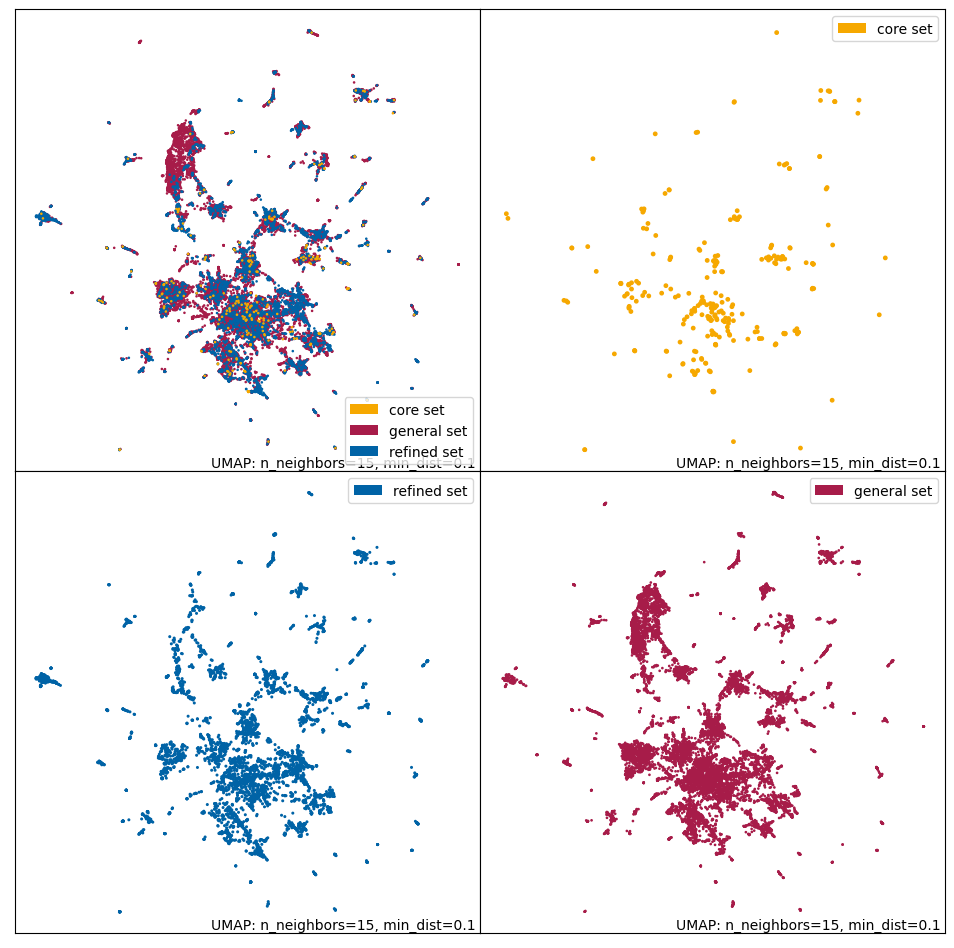

In [2]:
df_general = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/GRAIL-scores/PDBbind_general_set_grail_scores_GAP.csv")
df_general.drop("PDB code",inplace=True, axis=1)
df_general["Settype"] = "general set"
df_refined = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/ref_set_grail_descr_all.csv")
df_refined.drop("PDB code",inplace=True, axis=1)
df_refined["Settype"] = "refined set"
df_core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/core_set_grail_descr.csv")
df_core.drop("PDB code",inplace=True, axis=1)
df_core["Settype"] = "core set"

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_data = df.drop("Settype",inplace=False,axis=1)

df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("UMAP training DONE")

fig, ax = umap.plot.plt.subplots(2, 2, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Settype, color_key=["#F6A800","#A71C49","#0063A6"],ax=ax[0,0])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_core, labels=df_core.Settype, color_key=["#F6A800"],ax=ax[0,1])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_refined, labels=df_refined.Settype, color_key=["#0063A6"],ax=ax[1,0])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_general, labels=df_general.Settype, color_key=["#A71C49"],ax=ax[1,1])
print("Map 4 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

preprocessing DONE


/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP training DONE
Map 1 DONE
Map 2 DONE
Map 3 DONE
Map 4 DONE


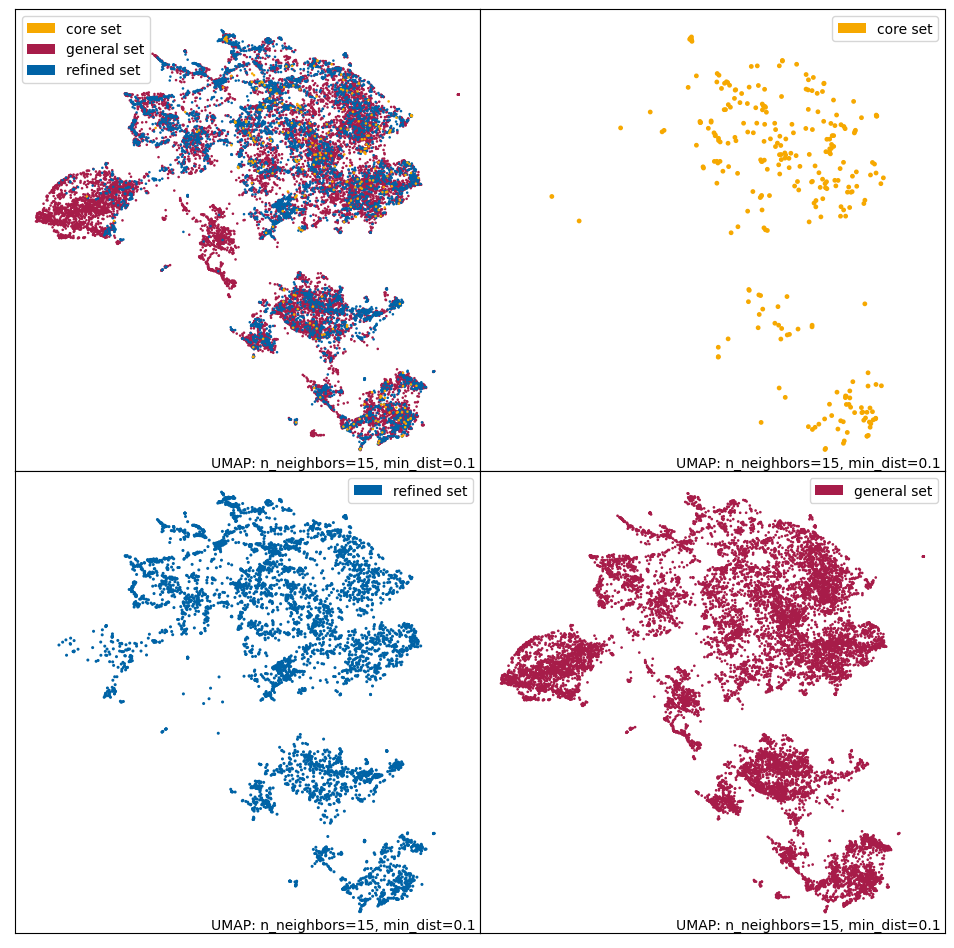

In [3]:
df_general = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/GRAIL-scores/PDBbind_general_set_grail_scores_slim.csv")
df_general.drop("PDB code",inplace=True, axis=1)
df_general["Settype"] = "general set"
df_refined = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_descrs_all.csv")
df_refined.drop("PDB code",inplace=True, axis=1)
df_refined["Settype"] = "refined set"
df_core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_descrs_all.csv")
df_core.drop("PDB code",inplace=True, axis=1)
df_core["Settype"] = "core set"

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_data = df.drop("Settype",inplace=False,axis=1)

df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general set"]
points_refined = points_all[df.Settype == "refined set"]
points_core = points_all[df.Settype == "core set"]
print("UMAP training DONE")

fig, ax = umap.plot.plt.subplots(2, 2, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Settype, color_key=["#F6A800","#A71C49","#0063A6"],ax=ax[0,0])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_core, labels=df_core.Settype, color_key=["#F6A800"],ax=ax[0,1])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_refined, labels=df_refined.Settype, color_key=["#0063A6"],ax=ax[1,0])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_general, labels=df_general.Settype, color_key=["#A71C49"],ax=ax[1,1])
print("Map 4 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

preprocessing DONE


/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(19727, 2) (8141, 2) (460, 2) (4718, 2) (4914, 2) (772, 2) (295, 2) (426, 2) (1, 2)
UMAP training DONE
Map 0 DONE
Map 1 DONE
Map 2 DONE
Map 3 DONE
Map 4 DONE
Map 5 DONE
Map 6 DONE
Map 7 DONE
Map 8 DONE


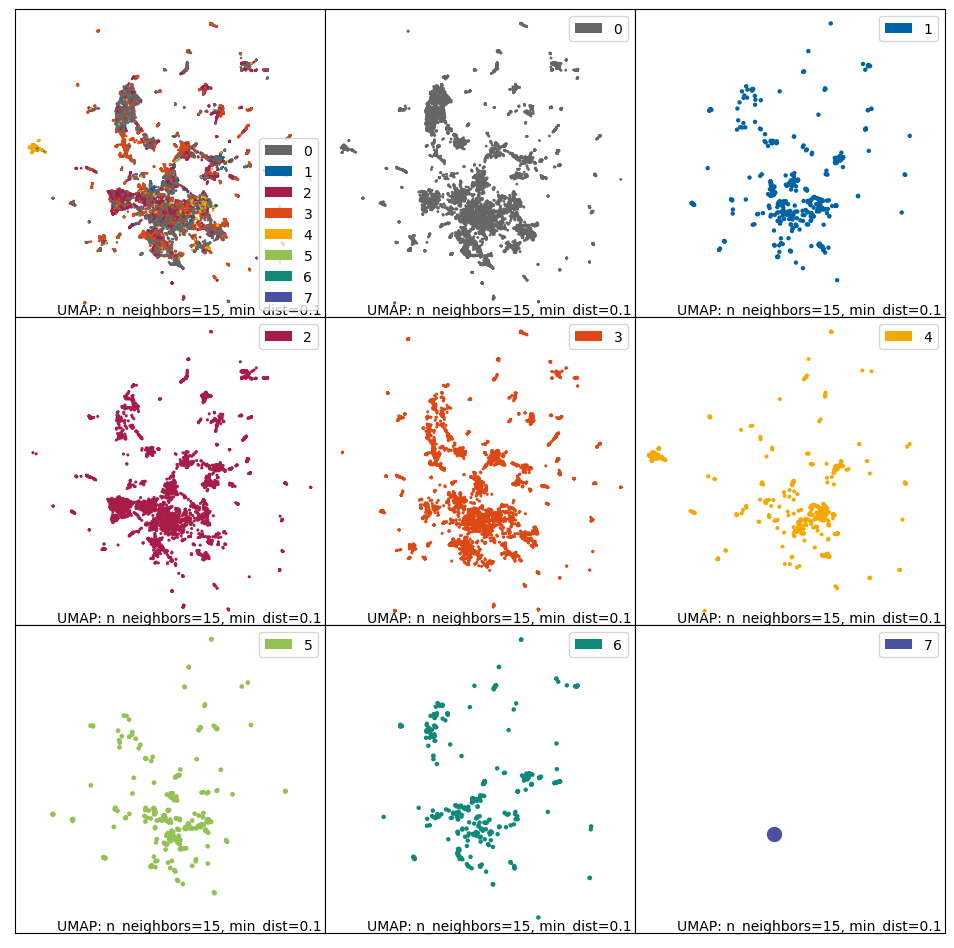

In [4]:
df_general = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/GRAIL-scores/PDBbind_general_set_grail_scores_GAP.csv")
df_refined = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/ref_set_grail_descr_all.csv")
df_core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/scripts/GAP/data/core_set_grail_descr.csv")

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_1 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, ax = umap.plot.plt.subplots(3, 3, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Class,ax=ax[0,0],color_key=["#666666","#0063A6","#A71C49","#DD4814","#F6A800","#94C154","#11897A","#4B51A1"])
print("Map 0 DONE")
umap.plot.points(reducer,points=points_0, labels=df[df["Class"]==0]["Class"],ax=ax[0,1],color_key=["#666666"])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_1, labels=df[df["Class"]==1]["Class"],ax=ax[0,2],color_key=["#0063A6"])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_2, labels=df[df["Class"]==2]["Class"],ax=ax[1,0],color_key=["#A71C49"])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_3, labels=df[df["Class"]==3]["Class"],ax=ax[1,1],color_key=["#DD4814"])
print("Map 4 DONE")
umap.plot.points(reducer,points=points_4, labels=df[df["Class"]==4]["Class"],ax=ax[1,2],color_key=["#F6A800"])
print("Map 5 DONE")
umap.plot.points(reducer,points=points_5, labels=df[df["Class"]==5]["Class"],ax=ax[2,0],color_key=["#94C154"])
print("Map 6 DONE")
umap.plot.points(reducer,points=points_6, labels=df[df["Class"]==6]["Class"],ax=ax[2,1],color_key=["#11897A"])
print("Map 7 DONE")
umap.plot.points(reducer,points=points_7, labels=df[df["Class"]==7]["Class"],ax=ax[2,2],color_key=["#4B51A1"])
print("Map 8 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

preprocessing DONE


/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(19727, 2) (8141, 2) (460, 2) (4718, 2) (4914, 2) (772, 2) (295, 2) (426, 2) (1, 2)
UMAP training DONE
Map 0 DONE
Map 1 DONE
Map 2 DONE
Map 3 DONE
Map 4 DONE
Map 5 DONE
Map 6 DONE
Map 7 DONE
Map 8 DONE


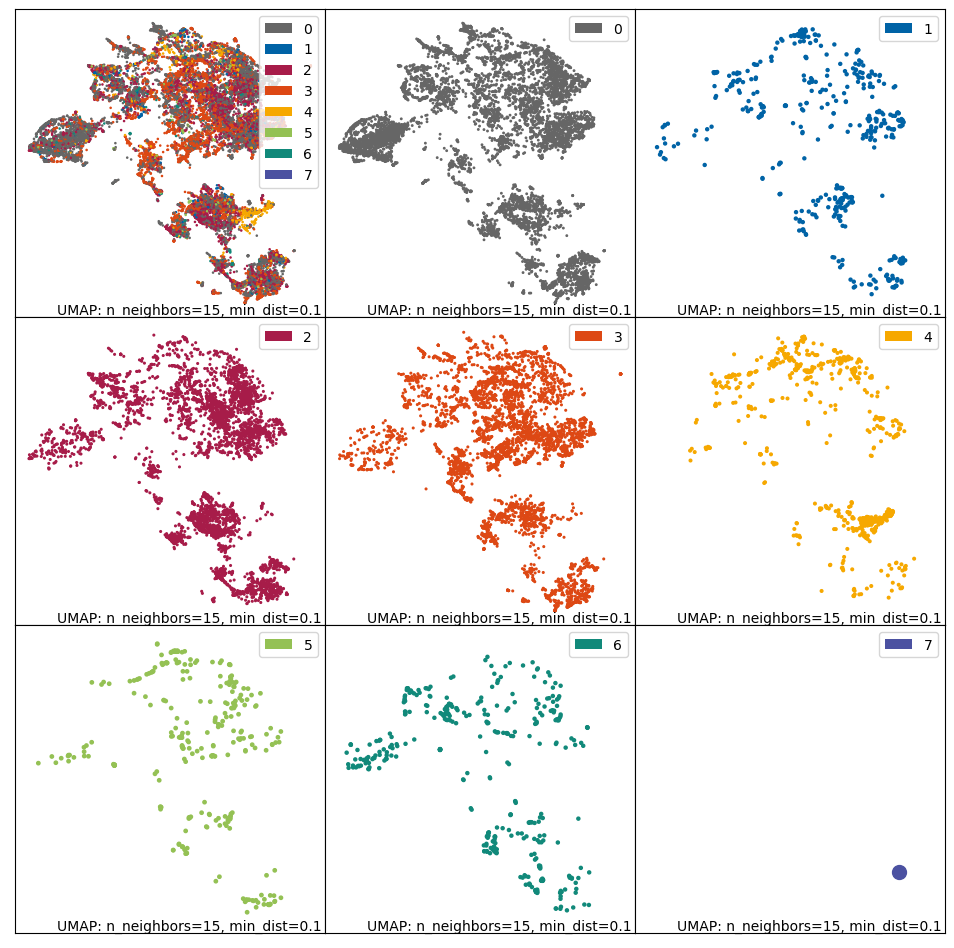

In [5]:
df_general = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/GRAIL-scores/PDBbind_general_set_grail_scores_slim.csv")
df_refined = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/ref_set_descrs_all.csv")
df_core = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/GAP/data/core_set_descrs_all.csv")

dataframes = [df_general,df_refined,df_core]
df = pd.concat(dataframes)

df_1 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, ax = umap.plot.plt.subplots(3, 3, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Class,ax=ax[0,0],color_key=["#666666","#0063A6","#A71C49","#DD4814","#F6A800","#94C154","#11897A","#4B51A1"])
print("Map 0 DONE")
umap.plot.points(reducer,points=points_0, labels=df[df["Class"]==0]["Class"],ax=ax[0,1],color_key=["#666666"])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_1, labels=df[df["Class"]==1]["Class"],ax=ax[0,2],color_key=["#0063A6"])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_2, labels=df[df["Class"]==2]["Class"],ax=ax[1,0],color_key=["#A71C49"])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_3, labels=df[df["Class"]==3]["Class"],ax=ax[1,1],color_key=["#DD4814"])
print("Map 4 DONE")
umap.plot.points(reducer,points=points_4, labels=df[df["Class"]==4]["Class"],ax=ax[1,2],color_key=["#F6A800"])
print("Map 5 DONE")
umap.plot.points(reducer,points=points_5, labels=df[df["Class"]==5]["Class"],ax=ax[2,0],color_key=["#94C154"])
print("Map 6 DONE")
umap.plot.points(reducer,points=points_6, labels=df[df["Class"]==6]["Class"],ax=ax[2,1],color_key=["#11897A"])
print("Map 7 DONE")
umap.plot.points(reducer,points=points_7, labels=df[df["Class"]==7]["Class"],ax=ax[2,2],color_key=["#4B51A1"])
print("Map 8 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [14]:
################################
#Morgan fingerprints (Ligands) #
################################


def processMoleculesFromFile(input_file: str) -> None:
     """
     Reads molecules from the provided input file and outputs the number of atoms and bonds for each molecule.

     Parameters:
     - input_file (str): Path to the input file.
     """
     # Create reader for input molecules (format specified by file extension)
     reader = Chem.MoleculeReader(input_file)

     # create an instance of the default implementation of the Chem.Molecule interface
     mol = Chem.BasicMolecule()

     # Iterate over each molecule and print atom and bond count
     try:
         while reader.read(mol):
             try:
                 print('Molecule with', mol.numAtoms, 'atoms and', mol.numBonds, 'bonds')
                 return mol
             except Exception as e:
                 sys.exit('Error: processing of molecule failed: ' + str(e))

     except Exception as e: # handle exception raised in case of severe read errors
         sys.exit('Error: reading molecule failed: ' + str(e))

def genECFP(mol: Chem.Molecule, num_bits: int, radius: int, inc_hs: bool, inc_config: bool) -> Util.BitSet:
    """
    Generates the binary ECFP for the given molecule.

    Parameters:
    - mol (Chem.Molecule): Molecule to process.
    - num_bits (int): Number of bits of the fingerprint.
    - radius (int): Max. atom environment radius in number of bonds.
    - inc_hs (bool): Whether to include explicit hydrogens.
    - inc_config (bool): Whether to include atom chirality.

    Returns:
    - Util.BitSet: The generated fingerprint.
    """

    Chem.calcImplicitHydrogenCounts(mol, False)        # calculate implicit hydrogen counts (if not yet done)
    Chem.perceiveHybridizationStates(mol, False)       # perceive atom hybridization states and set corresponding property for all atoms
    Chem.setRingFlags(mol, False)                      # perceive cycles and set corresponding atom and bond properties
    Chem.perceiveSSSR(mol, False)                      # perceive smallest set of smallest rings and store as Chem.MolecularGraph property
    Chem.setAromaticityFlags(mol, False)               # perceive aromaticity and set corresponding atom and bond properties

    ecfp_gen = Descr.CircularFingerprintGenerator()    # create ECFP generator instance

    if inc_config:
        ecfp_gen.includeChirality(True)                # allow atom chirality to have an impact on the ECFP generation
        Chem.calcAtomStereoDescriptors(mol, False)     # calculate atom stereo descriptors and set corresponding property for all atoms

    if inc_hs:
        ecfp_gen.includeHydrogens(True)                # include explicit hydrogens in the ECFP generation
        Chem.makeHydrogenComplete(mol)                 # make any implicit hydrogens explicit

    fp = Util.BitSet()                                 # create fingerprint bitset
    fp.resize(num_bits)                                # set desired fingerprint size

    ecfp_gen.setNumIterations(radius)                  # set num. iterations (=atom. env. radius)
    ecfp_gen.generate(mol)                             # extract chracteristic structural features
    ecfp_gen.setFeatureBits(fp)                        # set bits associated with the extracted structural features

    # if needed, fp could be converted into a numpy single precision float array as follows:
    fp = np.array(fp, dtype=np.float32)

    return fp

mol = processMoleculesFromFile("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/CASF-2016/coreset/1a30/1a30_ligand.mol2")
fp = genECFP(mol, 1024, 2, True, True)

data = ["/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/CASF-2016/coreset/","/data/shared/datasets/PDBbind/general-set/","/data/shared/datasets/PDBbind/refined-set/"]


PDBs = []
ECFPs = []
sets = []

for d in data:
    for root, dirs, files in os.walk(d):
        for file in files:
            if file.endswith("ligand.mol2"):
                mol = processMoleculesFromFile(os.path.join(root, file))
                dir = os.path.join(root, file).split("/")
                sets.append(dir[-3])
                PDBs.append(dir[-2])
                ECFP = genECFP(mol, 1024, 2, True, True)
                ECFPs.append(ECFP)
                print("Molecule",file,"processed")

fp_df = pd.DataFrame(data=ECFPs,index=np.array(range(0,len(ECFPs))),columns=np.array(range(1,1025)))

print(fp_df.shape)

df = pd.DataFrame({"PDB code":PDBs,"Settype":sets})
result = pd.concat([df,fp_df],axis=1)
print(result.shape)
result.to_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/ECFPs.csv",index=False)

Molecule with 49 atoms and 48 bonds
Molecule with 36 atoms and 38 bonds
Molecule 3jvr_ligand.mol2 processed
Molecule with 50 atoms and 52 bonds
Molecule 3ozs_ligand.mol2 processed
Molecule with 130 atoms and 133 bonds
Molecule 3uri_ligand.mol2 processed
Molecule with 52 atoms and 53 bonds
Molecule 2zcr_ligand.mol2 processed
Molecule with 31 atoms and 30 bonds
Molecule 3u9q_ligand.mol2 processed
Molecule with 21 atoms and 21 bonds
Molecule 3lka_ligand.mol2 processed
Molecule with 37 atoms and 38 bonds
Molecule 4jfs_ligand.mol2 processed
Molecule with 84 atoms and 86 bonds
Molecule 4w9l_ligand.mol2 processed
Molecule with 18 atoms and 18 bonds
Molecule 3gv9_ligand.mol2 processed
Molecule with 57 atoms and 61 bonds
Molecule 4e5w_ligand.mol2 processed
Molecule with 84 atoms and 88 bonds
Molecule 2x00_ligand.mol2 processed
Molecule with 48 atoms and 49 bonds
Molecule 2yfe_ligand.mol2 processed
Molecule with 25 atoms and 25 bonds
Molecule 2j78_ligand.mol2 processed
Molecule with 51 atoms and

preprocessing DONE


/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP training DONE
(19728, 2) (14127, 2) (5316, 2) (285, 2)
Map 1 DONE
Map 2 DONE
Map 3 DONE
Map 4 DONE


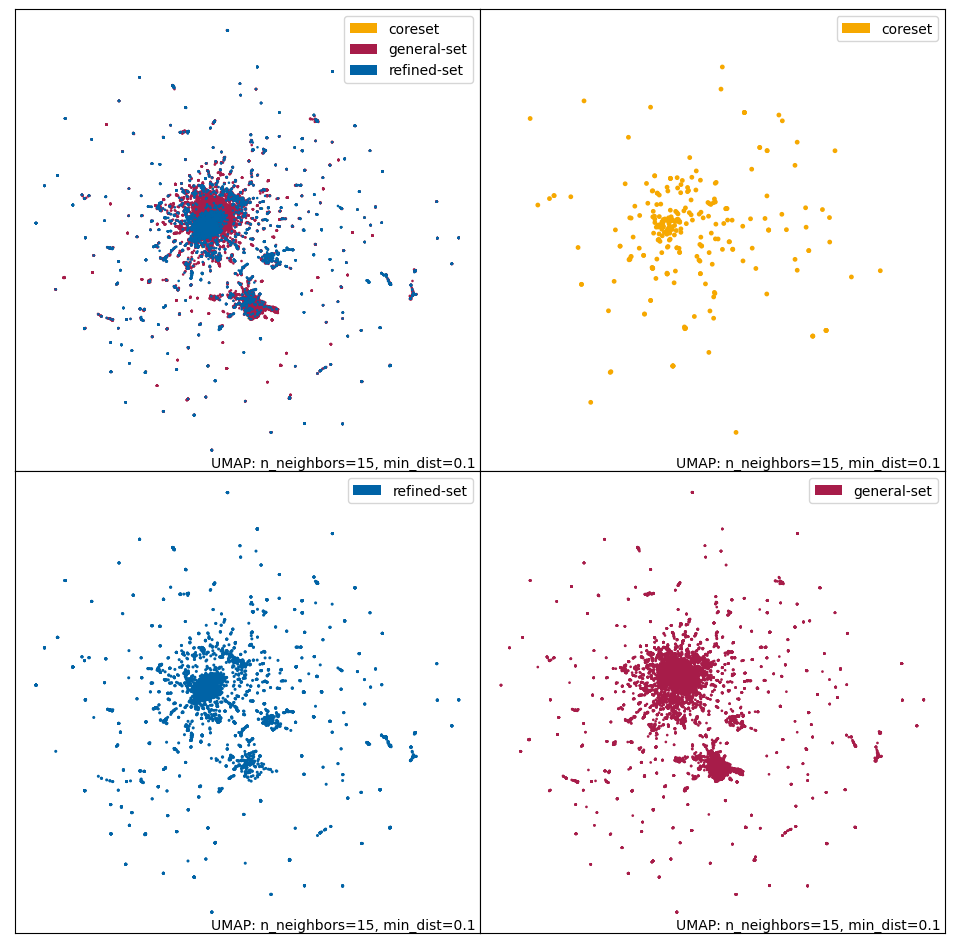

In [7]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/ECFPs.csv")
df.drop("PDB code",inplace=True, axis=1)

df_general = df[df["Settype"] == "general-set"]
df_refined = df[df["Settype"] == "refined-set"]
df_core = df[df["Settype"] == "coreset"]

df_data = df.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)
reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general-set"]
points_refined = points_all[df.Settype == "refined-set"]
points_core = points_all[df.Settype == "coreset"]
print("UMAP training DONE")
print(points_all.shape,points_general.shape,points_refined.shape,points_core.shape)

fig, ax = umap.plot.plt.subplots(2, 2, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Settype, color_key=["#F6A800","#A71C49","#0063A6"],ax=ax[0,0])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_core, labels=df_core.Settype, color_key=["#F6A800"],ax=ax[0,1])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_refined, labels=df_refined.Settype, color_key=["#0063A6"],ax=ax[1,0])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_general, labels=df_general.Settype, color_key=["#A71C49"],ax=ax[1,1])
print("Map 4 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

/tmp/ipykernel_12346/3636171429.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_12346/3636171429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined.drop("Settype",inplace=True, axis=1)
/tmp/ipykernel_12346/3636171429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core.drop("Settype",inplace=True, axis=1)


preprocessing DONE


/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/cfellinger/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/cfellinger/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(19728, 2) (8141, 2) (460, 2) (4718, 2) (4915, 2) (772, 2) (295, 2) (426, 2) (1, 2)
UMAP training DONE
Map 0 DONE
Map 1 DONE
Map 2 DONE
Map 3 DONE
Map 4 DONE
Map 5 DONE
Map 6 DONE
Map 7 DONE
Map 8 DONE


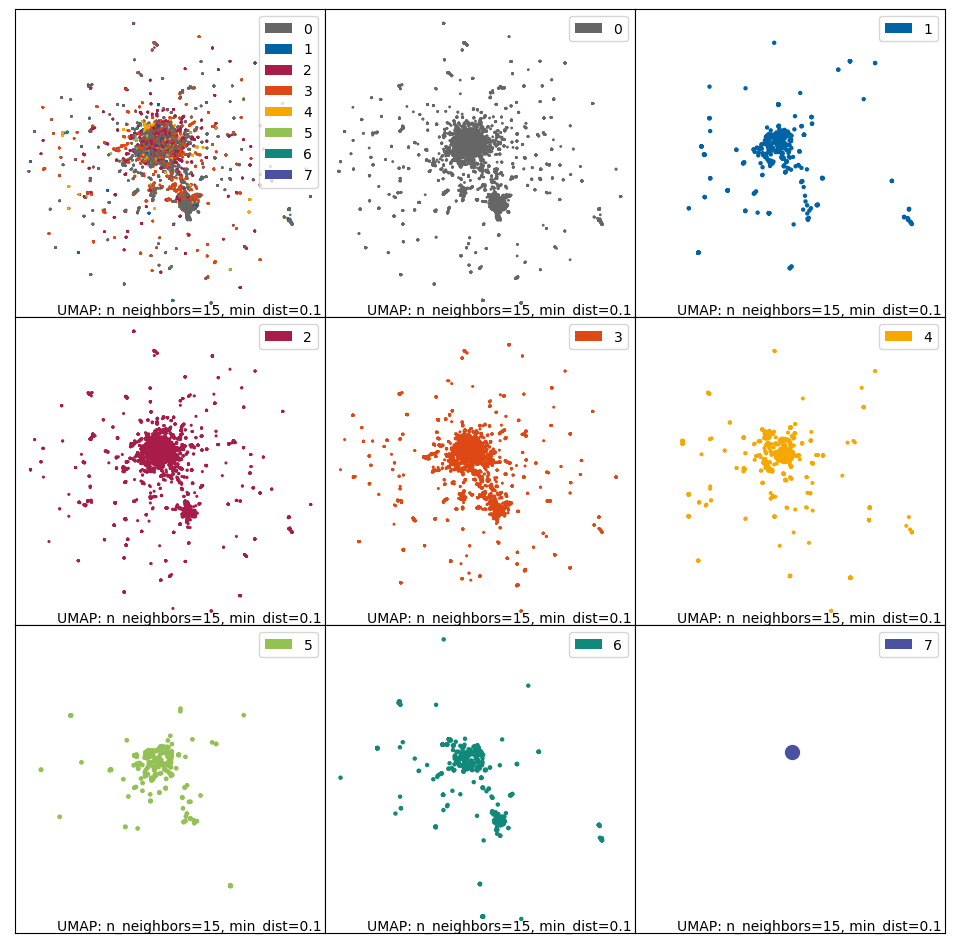

In [10]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/ECFPs.csv")

df_general = df[df["Settype"] == "general-set"]
df_refined = df[df["Settype"] == "refined-set"]
df_core = df[df["Settype"] == "coreset"]

df.drop("Settype",inplace=True, axis=1)
df_general.drop("Settype",inplace=True, axis=1)
df_refined.drop("Settype",inplace=True, axis=1)
df_core.drop("Settype",inplace=True, axis=1)

df_1 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, ax = umap.plot.plt.subplots(3, 3, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Class,ax=ax[0,0],color_key=["#666666","#0063A6","#A71C49","#DD4814","#F6A800","#94C154","#11897A","#4B51A1"])
print("Map 0 DONE")
umap.plot.points(reducer,points=points_0, labels=df[df["Class"]==0]["Class"],ax=ax[0,1],color_key=["#666666"])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_1, labels=df[df["Class"]==1]["Class"],ax=ax[0,2],color_key=["#0063A6"])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_2, labels=df[df["Class"]==2]["Class"],ax=ax[1,0],color_key=["#A71C49"])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_3, labels=df[df["Class"]==3]["Class"],ax=ax[1,1],color_key=["#DD4814"])
print("Map 4 DONE")
umap.plot.points(reducer,points=points_4, labels=df[df["Class"]==4]["Class"],ax=ax[1,2],color_key=["#F6A800"])
print("Map 5 DONE")
umap.plot.points(reducer,points=points_5, labels=df[df["Class"]==5]["Class"],ax=ax[2,0],color_key=["#94C154"])
print("Map 6 DONE")
umap.plot.points(reducer,points=points_6, labels=df[df["Class"]==6]["Class"],ax=ax[2,1],color_key=["#11897A"])
print("Map 7 DONE")
umap.plot.points(reducer,points=points_7, labels=df[df["Class"]==7]["Class"],ax=ax[2,2],color_key=["#4B51A1"])
print("Map 8 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [4]:
################################
#Morgan fingerprints (Proteins)#
################################


def processMoleculesFromFile(input_file: str) -> None:
     """
     Reads molecules from the provided input file and outputs the number of atoms and bonds for each molecule.

     Parameters:
     - input_file (str): Path to the input file.
     """
     # Create reader for input molecules (format specified by file extension)
     reader = Chem.MoleculeReader(input_file)

     # create an instance of the default implementation of the Chem.Molecule interface
     mol = Chem.BasicMolecule()

     # Iterate over each molecule and print atom and bond count
     try:
         while reader.read(mol):
             try:
                 print('Molecule with', mol.numAtoms, 'atoms and', mol.numBonds, 'bonds')
                 return mol
             except Exception as e:
                 sys.exit('Error: processing of molecule failed: ' + str(e))

     except Exception as e: # handle exception raised in case of severe read errors
         sys.exit('Error: reading molecule failed: ' + str(e))

def genECFP(mol: Chem.Molecule, num_bits: int, radius: int, inc_hs: bool, inc_config: bool) -> Util.BitSet:
    """
    Generates the binary ECFP for the given molecule.

    Parameters:
    - mol (Chem.Molecule): Molecule to process.
    - num_bits (int): Number of bits of the fingerprint.
    - radius (int): Max. atom environment radius in number of bonds.
    - inc_hs (bool): Whether to include explicit hydrogens.
    - inc_config (bool): Whether to include atom chirality.

    Returns:
    - Util.BitSet: The generated fingerprint.
    """

    Chem.calcImplicitHydrogenCounts(mol, False)        # calculate implicit hydrogen counts (if not yet done)
    Chem.perceiveHybridizationStates(mol, False)       # perceive atom hybridization states and set corresponding property for all atoms
    Chem.setRingFlags(mol, False)                      # perceive cycles and set corresponding atom and bond properties
    Chem.perceiveSSSR(mol, False)                      # perceive smallest set of smallest rings and store as Chem.MolecularGraph property
    Chem.setAromaticityFlags(mol, False)               # perceive aromaticity and set corresponding atom and bond properties

    ecfp_gen = Descr.CircularFingerprintGenerator()    # create ECFP generator instance

    if inc_config:
        ecfp_gen.includeChirality(True)                # allow atom chirality to have an impact on the ECFP generation
        Chem.calcAtomStereoDescriptors(mol, False)     # calculate atom stereo descriptors and set corresponding property for all atoms

    if inc_hs:
        ecfp_gen.includeHydrogens(True)                # include explicit hydrogens in the ECFP generation
        Chem.makeHydrogenComplete(mol)                 # make any implicit hydrogens explicit

    fp = Util.BitSet()                                 # create fingerprint bitset
    fp.resize(num_bits)                                # set desired fingerprint size

    ecfp_gen.setNumIterations(radius)                  # set num. iterations (=atom. env. radius)
    ecfp_gen.generate(mol)                             # extract chracteristic structural features
    ecfp_gen.setFeatureBits(fp)                        # set bits associated with the extracted structural features

    # if needed, fp could be converted into a numpy single precision float array as follows:
    fp = np.array(fp, dtype=np.float32)

    return fp

mol = processMoleculesFromFile("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/CASF-2016/coreset/1a30/1a30_ligand.mol2")
fp = genECFP(mol, 1024, 2, True, True)

data = ["/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/CASF-2016/coreset/","/data/shared/datasets/PDBbind/general-set/","/data/shared/datasets/PDBbind/refined-set/"]


PDBs = []
ECFPs = []
sets = []

for d in data:
    for root, dirs, files in os.walk(d):
        for file in files:
            if file.endswith("protein.mol2"):
                mol = processMoleculesFromFile(os.path.join(root, file))
                dir = os.path.join(root, file).split("/")
                sets.append(dir[-3])
                PDBs.append(dir[-2])
                ECFP = genECFP(mol, 1024, 2, True, True)
                ECFPs.append(ECFP)
                print("Molecule",file,"processed")

fp_df = pd.DataFrame(data=ECFPs,index=np.array(range(0,len(ECFPs))),columns=np.array(range(1,1025)))

print(fp_df.shape)

df = pd.DataFrame({"PDB code":PDBs,"Settype":sets})
result = pd.concat([df,fp_df],axis=1)
print(result.shape)
result.to_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/ECFPs_prot.csv",index=False)

Molecule with 49 atoms and 48 bonds
Molecule with 4216 atoms and 4264 bonds
Molecule 3jvr_protein.mol2 processed
Molecule with 3356 atoms and 3389 bonds
Molecule 3ozs_protein.mol2 processed
Molecule with 4651 atoms and 4707 bonds
Molecule 3uri_protein.mol2 processed
Molecule with 4670 atoms and 4725 bonds
Molecule 2zcr_protein.mol2 processed
Molecule with 4178 atoms and 4211 bonds
Molecule 3u9q_protein.mol2 processed


In [ ]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/ECFPs_prot.csv")
df.drop("PDB code",inplace=True, axis=1)

df_general = df[df["Settype"] == "general-set"]
df_refined = df[df["Settype"] == "refined-set"]
df_core = df[df["Settype"] == "coreset"]

df_data = df.drop("Settype",inplace=False,axis=1)
df_general_data = df_general.drop("Settype",inplace=False,axis=1)
df_refined_data = df_refined.drop("Settype",inplace=False,axis=1)
df_core_data = df_core.drop("Settype",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)
reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_general = points_all[df.Settype == "general-set"]
points_refined = points_all[df.Settype == "refined-set"]
points_core = points_all[df.Settype == "coreset"]
print("UMAP training DONE")
print(points_all.shape,points_general.shape,points_refined.shape,points_core.shape)

fig, ax = umap.plot.plt.subplots(2, 2, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Settype, color_key=["#F6A800","#A71C49","#0063A6"],ax=ax[0,0])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_core, labels=df_core.Settype, color_key=["#F6A800"],ax=ax[0,1])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_refined, labels=df_refined.Settype, color_key=["#0063A6"],ax=ax[1,0])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_general, labels=df_general.Settype, color_key=["#A71C49"],ax=ax[1,1])
print("Map 4 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [ ]:
df = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/ECFPs.csv")

df_general = df[df["Settype"] == "general-set"]
df_refined = df[df["Settype"] == "refined-set"]
df_core = df[df["Settype"] == "coreset"]

df.drop("Settype",inplace=True, axis=1)
df_general.drop("Settype",inplace=True, axis=1)
df_refined.drop("Settype",inplace=True, axis=1)
df_core.drop("Settype",inplace=True, axis=1)

df_1 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/1_x_x_x.csv")
df_2 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/2_x_x_x.csv")
df_3 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/3_x_x_x.csv")
df_4 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/4_x_x_x.csv")
df_5 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/5_x_x_x.csv")
df_6 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/6_x_x_x.csv")
df_7 = pd.read_csv("/data/shared/projects/pharmacophore_hot_spot_analysis/phantomdragon/data/EC_numbers/7_x_x_x.csv")

lst = []

for pdb in df["PDB code"]:
    if pdb in df_1["PDB code"].values:
        lst.append(1)
    elif pdb in df_2["PDB code"].values:
        lst.append(2)
    elif pdb in df_3["PDB code"].values:
        lst.append(3)
    elif pdb in df_4["PDB code"].values:
        lst.append(4)
    elif pdb in df_5["PDB code"].values:
        lst.append(5)
    elif pdb in df_6["PDB code"].values:
        lst.append(6)
    elif pdb in df_7["PDB code"].values:
        lst.append(7)
    else:
        lst.append(0)

df["Class"] = lst

df.drop("PDB code",inplace=True, axis=1)

df_data = df.drop("Class",inplace=False,axis=1)

df_refined_data = df_refined.drop("PDB code",inplace=False,axis=1)
scaler = StandardScaler().fit(df_refined_data)

df_scaled = scaler.transform(df_data)

df_scaled = np.nan_to_num(df_scaled)
print("preprocessing DONE")

reducer =umap.UMAP(random_state=42)

reducer = reducer.fit(df_scaled)
points_all = reducer.fit_transform(df_scaled)
points_0 = points_all[df.Class == 0]
points_1 = points_all[df.Class == 1]
points_2 = points_all[df.Class == 2]
points_3 = points_all[df.Class == 3]
points_4 = points_all[df.Class == 4]
points_5 = points_all[df.Class == 5]
points_6 = points_all[df.Class == 6]
points_7 = points_all[df.Class == 7]
print(points_all.shape,points_0.shape,points_1.shape,points_2.shape,points_3.shape,points_4.shape,points_5.shape,points_6.shape,points_7.shape)
print("UMAP training DONE")

fig, ax = umap.plot.plt.subplots(3, 3, figsize=(12,12),sharex=True,sharey=True)
umap.plot.points(reducer,points=points_all, labels=df.Class,ax=ax[0,0],color_key=["#666666","#0063A6","#A71C49","#DD4814","#F6A800","#94C154","#11897A","#4B51A1"])
print("Map 0 DONE")
umap.plot.points(reducer,points=points_0, labels=df[df["Class"]==0]["Class"],ax=ax[0,1],color_key=["#666666"])
print("Map 1 DONE")
umap.plot.points(reducer,points=points_1, labels=df[df["Class"]==1]["Class"],ax=ax[0,2],color_key=["#0063A6"])
print("Map 2 DONE")
umap.plot.points(reducer,points=points_2, labels=df[df["Class"]==2]["Class"],ax=ax[1,0],color_key=["#A71C49"])
print("Map 3 DONE")
umap.plot.points(reducer,points=points_3, labels=df[df["Class"]==3]["Class"],ax=ax[1,1],color_key=["#DD4814"])
print("Map 4 DONE")
umap.plot.points(reducer,points=points_4, labels=df[df["Class"]==4]["Class"],ax=ax[1,2],color_key=["#F6A800"])
print("Map 5 DONE")
umap.plot.points(reducer,points=points_5, labels=df[df["Class"]==5]["Class"],ax=ax[2,0],color_key=["#94C154"])
print("Map 6 DONE")
umap.plot.points(reducer,points=points_6, labels=df[df["Class"]==6]["Class"],ax=ax[2,1],color_key=["#11897A"])
print("Map 7 DONE")
umap.plot.points(reducer,points=points_7, labels=df[df["Class"]==7]["Class"],ax=ax[2,2],color_key=["#4B51A1"])
print("Map 8 DONE")
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()